In [1]:
import os
import datetime
from datetime import timedelta
import numpy as np
from funcs import get_parc_sizes, extract
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def timeTicks(y, pos):                                                                                                                                                                                                                                                         
    d = datetime.timedelta(seconds=y)                                                                                                                                                                                                                                          
    return str(d)

def set_y_time(ax):
    formatter = matplotlib.ticker.FuncFormatter(timeTicks)                                                                                                                                                                                                                         
    ax.yaxis.set_major_formatter(formatter)
    
def round_size(df, r):
    
    df_copy = df.copy(deep=True)
    df_copy['size'] = (df_copy['size'] * 1/r).astype(int) * r
    return df_copy

def proc_file(file, dr):

    full_path = os.path.join(dr, file)

    # Open file
    with open(full_path, 'r') as f:
        txt = f.readlines()

    # Check for multiple runs
    is_new_run = ['run  ' in line for line in txt]

    # Multiple run case
    if sum(is_new_run) >= 2:
        inds = list(np.where(is_new_run)[0]) + [None]

        for i in range(len(inds)-1):
            add(txt[inds[i]:inds[i+1]])

    # Single run case
    else:
        add(txt)
        
def proc_dr(dr):

    files = os.listdir(dr)
    files = [file for file in files if '.out' in file]

    for file in files:
        try:
            proc_file(file, dr)
        except:
            print('Error with:', file)

In [3]:
# Load parc sizes
parc_sizes = get_parc_sizes(everything=True)

# Init timing df
timing = pd.DataFrame(columns=['model', 'size', 'is_b',
                               'time', 'p_type',
                               'n_jobs', 'n_load_saved'])

# Helper function
def add(file_txt):
    ex = extract(file_txt, parc_sizes)
    if ex is not None:
        timing.loc[len(timing)] = list(ex)


# Special case
proc_dr('../exp/All_Job_Logs/Original_Job_Logs_Ignore_SVM')
to_remove = timing[timing['model'] == 'svm'].index
print(timing.shape)

# Process rest, Job_Logs1-9
for i in range(1, 10):
    proc_dr(f'../exp/All_Job_Logs/Job_Logs{i}')
    print(timing.shape)
    
timing.drop(to_remove, inplace=True)
print(timing.shape)

(26382, 7)
(51915, 7)
(67205, 7)
(75794, 7)
(88578, 7)
(102252, 7)
Error with: alternate_2965775.out
Error with: alternate_2965768.out
Error with: alternate_2965773.out
Error with: alternate_2965828.out
Error with: alternate_2965671.out
Error with: alternate_2965673.out
Error with: alternate_2965770.out
Error with: alternate_2965777.out
Error with: alternate_2965667.out
Error with: alternate_2965831.out
Error with: alternate_2965772.out
Error with: alternate_2965675.out
Error with: alternate_2965643.out
Error with: alternate_2965676.out
Error with: alternate_2965774.out
Error with: alternate_2965826.out
Error with: alternate_2965829.out
Error with: alternate_2965769.out
Error with: alternate_2965827.out
Error with: alternate_2965765.out
Error with: alternate_2965674.out
Error with: alternate_2965767.out
Error with: alternate_2965825.out
Error with: alternate_2965776.out
Error with: alternate_2965669.out
Error with: alternate_2965766.out
Error with: alternate_2965830.out
Error with: alt

In [4]:
timing.to_pickle('timing.pkl')

In [5]:
# Gen copy with no load
no_load = timing.loc[timing[timing['n_load_saved'] == 0].index]
no_load.shape

(58708, 7)

In [6]:
# Just base
just_base = timing[timing['p_type'] == 'base']
just_base.shape

(32032, 7)

In [7]:
# Just base 4
just_base4 = just_base[just_base['n_jobs'] == 4]
just_base4.shape

(9639, 7)

In [8]:
# Just base 8
just_base8 = just_base[just_base['n_jobs'] == 8]
just_base8.shape

(19449, 7)

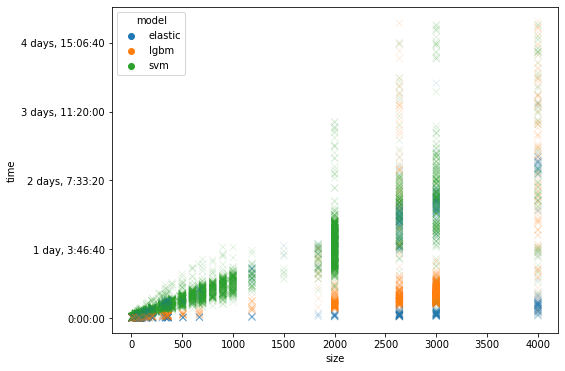

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=just_base4, alpha=.2,
                x="size", y="time", ax=ax,
                hue="model", marker="x", s=50)
set_y_time(ax)

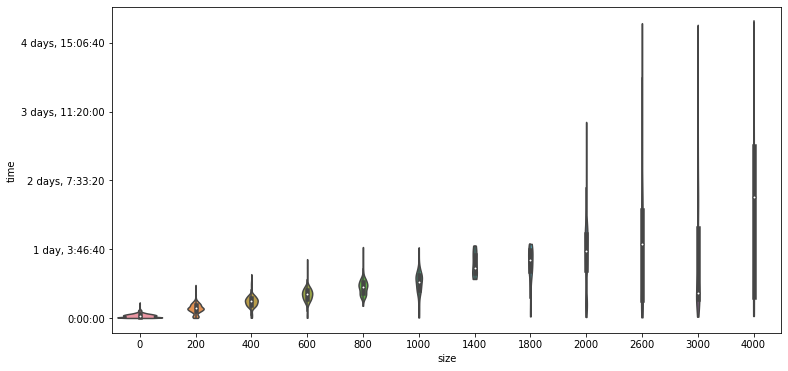

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=round_size(just_base4, 200), cut=0,
               x="size", y="time", ax=ax)
set_y_time(ax)

## Base

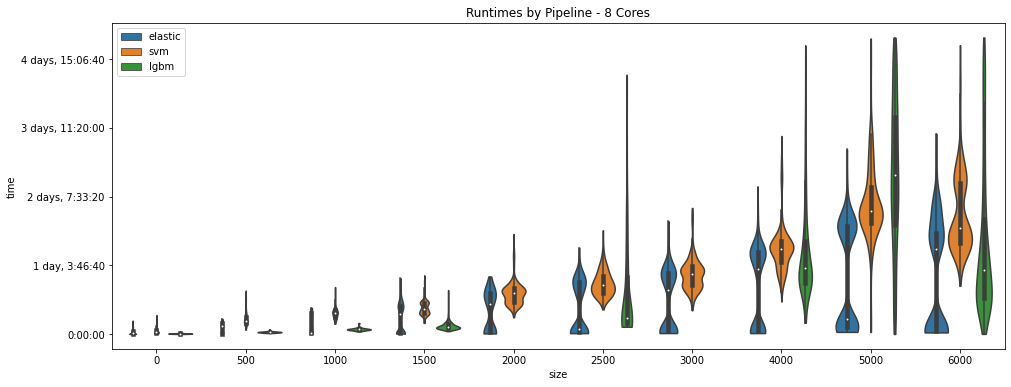

In [11]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.violinplot(data=round_size(just_base8, 500),
               cut=0,
               x="size",
               y="time",
               ax=ax,
               hue="model")

set_y_time(ax)
plt.legend(loc=2)

plt.title('Runtimes by Pipeline - 8 Cores')
plt.savefig('Figures/runtimes_by_model_8.png', dpi=200, bbox_inches='tight')

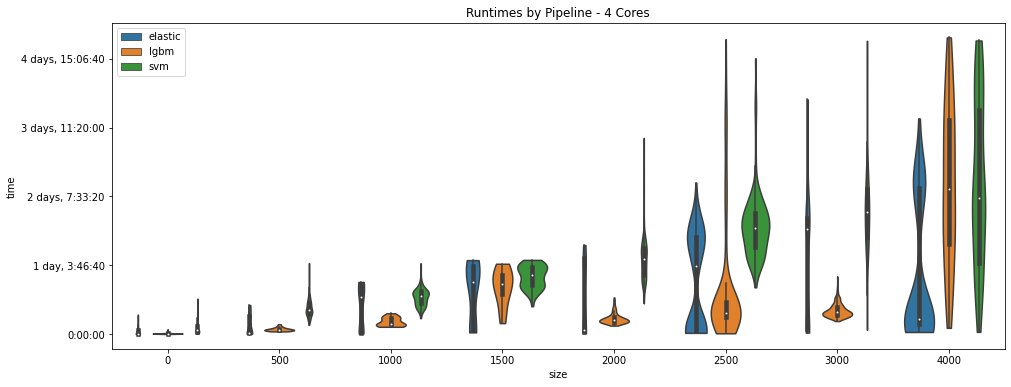

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.violinplot(data=round_size(just_base4, 500),
               cut=0,
               x="size",
               y="time",
               ax=ax,
               hue="model")

set_y_time(ax)
plt.legend(loc=2)

plt.title('Runtimes by Pipeline - 4 Cores')
plt.savefig('Figures/runtimes_by_model_4.png', dpi=200, bbox_inches='tight')